In [2]:
import sys
import os
from pathlib import Path
# Add the utils directory to sys.path
sys.path.append(str(Path(os.getcwd()).resolve().parents[1]))
import cv2
import matplotlib.pyplot as plt
from collections import defaultdict
import os
from utils.paper_plots import create_pie_chart, set_custom_color_style

Video: DJI_0151_cut, Skier: 4, Camera Angle: Front, FPS: 30.0, Resolution: (1920, 1080)
Video: DJI_0175_cut, Skier: 3, Camera Angle: Left, FPS: 30.0, Resolution: (1920, 1080)
Video: DJI_0147_cut, Skier: 2, Camera Angle: Right, FPS: 30.0, Resolution: (1920, 1080)
Video: DJI_0184_cut, Skier: 3, Camera Angle: Front, FPS: 30.0, Resolution: (1920, 1080)
Video: DJI_0065, Skier: 10, Camera Angle: Left, FPS: 30.0, Resolution: (1920, 1080)
Video: DJI_0063, Skier: 13, Camera Angle: Front, FPS: 30.0, Resolution: (1920, 1080)
Video: DJI_0072, Skier: 12, Camera Angle: Left, FPS: 30.0, Resolution: (1920, 1080)
Video: DJI_0087, Skier: 13, Camera Angle: Right, FPS: 30.0, Resolution: (1920, 1080)
Video: DJI_0068, Skier: 12, Camera Angle: Right, FPS: 30.0, Resolution: (1920, 1080)
Video: DJI_0040, Skier: 8, Camera Angle: Front, FPS: 29.97002997002997, Resolution: (1920, 1080)
Video: DJI_0015_cut, Skier: 8, Camera Angle: Right, FPS: 30.0, Resolution: (1920, 1080)
Video: DJI_0054_cut, Skier: 8, Camera Ang

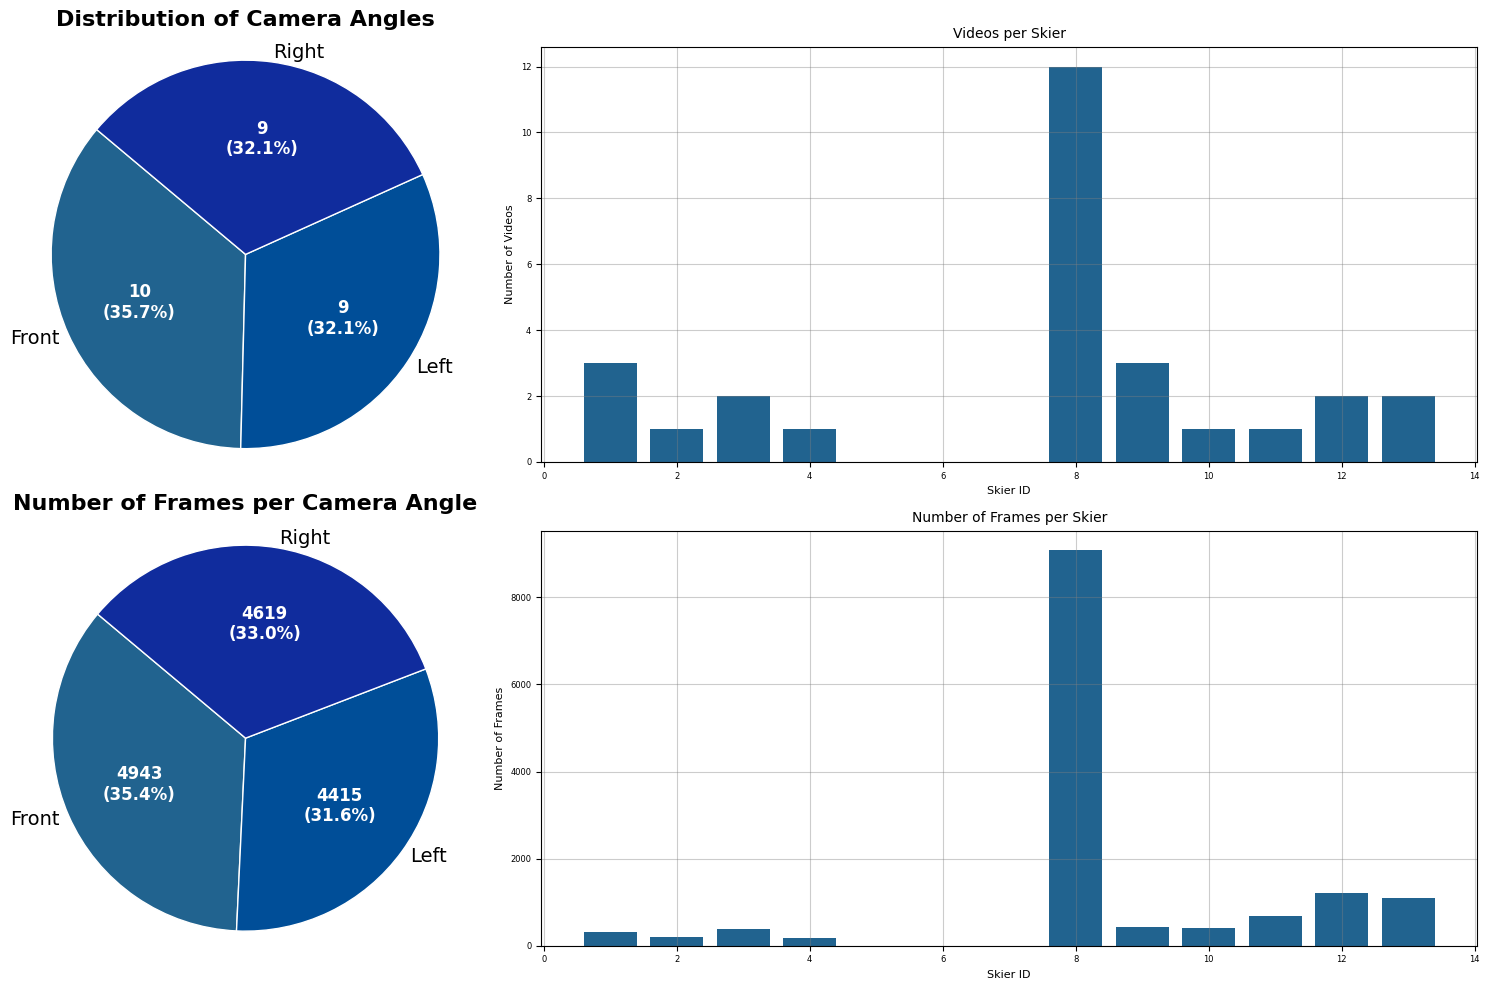

In [3]:
# Your table of skier and video associations
skiers_videos = {
    "DJI_0151_cut" : (4, "Front"),
    "DJI_0175_cut" : (3, "Left"),
    "DJI_0147_cut" : (2, "Right"),
    "DJI_0184_cut" : (3, "Front"),
    "DJI_0065" : (10, "Left"),
    "DJI_0063" : (13, "Front"),
    "DJI_0072" : (12, "Left"),
    "DJI_0087" : (13, "Right"),
    "DJI_0068" : (12, "Right"),
    "DJI_0040" : (8, "Front"),
    "DJI_0015_cut" : (8, "Right"),
    "DJI_0054_cut" : (8, "Right"),
    "DJI_0014_cut" : (8, "Left"),
    "DJI_0092" : (11, "Front"),
    "DJI_0018_cut" : (8, "Left"),
    "DJI_0025" : (8, "Front"),
    "DJI_0022_cut" : (8, "Left"),
    "DJI_0017_cut" : (8, "Right"),
    "DJI_0038" : (8, "Front"),
    "DJI_0044" : (8, "Right"),
    "DJI_0043" : (8, "Left"),
    "DJI_0009_cut" : (8, "Front"),
    "DJI_0058_test_seq": (9, "Front"),
    "DJI_0124_test_seq": (9, "Left"),
    "DJI_0128_test_seq": (9, "Right"),
    "DJI_0154_test_seq": (1, "Right"),
    "DJI_0153_test_seq": (1, "Left"),
    "DJI_0144_test_seq": (1, "Front"),
}

folder = r"C:\awilde\britta\LTU\SkiingProject\SkiersProject\Data\annotated_videos"

# Initialize dictionaries to store data
frame_counts = defaultdict(int)
camera_angle_counts = defaultdict(int)
#skier_frame_counts = defaultdict(int)
skier_video_counts = defaultdict(int)
camera_angle_frame_counts = defaultdict(int)
video_info = {}

# Iterate through each video in the skiers_videos dictionary
for video_file, (skier, camera_angle) in skiers_videos.items():
    video_path = os.path.join(folder, f"{video_file}.mp4")
    cap = cv2.VideoCapture(video_path)  # Assuming videos are in .mp4 format (adjust if needed)

    if not cap.isOpened():
        print(f"Error: Unable to open video {video_file}")
        continue
    
    # Get video properties: frames per second, width, height
    fps = cap.get(cv2.CAP_PROP_FPS)  # Frames per second
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))  # Video width
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))  # Video height
    
    # Store this information in a dictionary
    video_info[video_file] = {
        "Skier": skier,
        "Camera Angle": camera_angle,
        "FPS": fps,
        "Resolution": (width, height)
    }
    
    # Get total frames in the video
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Add frame count to the respective skier
    frame_counts[skier] += total_frames
    camera_angle_counts[camera_angle] += 1  # Count the camera angle occurrences
    camera_angle_frame_counts[camera_angle] += total_frames
    #skier_frame_counts[skier] += total_frames
    skier_video_counts[skier] += 1
    
    cap.release()
    
# Print video information (FPS and resolution)
for video_file, info in video_info.items():
    print(f"Video: {video_file}, Skier: {info['Skier']}, Camera Angle: {info['Camera Angle']}, "
          f"FPS: {info['FPS']}, Resolution: {info['Resolution']}")

# Prepare data for plotting
skiers_list = list(frame_counts.keys())
frame_values = list(frame_counts.values())
camera_angles = list(camera_angle_counts.keys())
camera_angle_values = list(camera_angle_counts.values())
camera_angle_frame_values = list(camera_angle_frame_counts.values())

blues = set_custom_color_style()

# Create the figure with 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10), width_ratios=[1, 2])
#fig.suptitle("Statistics regarding the annotated videos only")

# 1. Bar chart for frame count per skier
axs[1][1].bar(skiers_list, frame_values)
axs[1][1].set_title('Number of Frames per Skier')
axs[1][1].set_xlabel('Skier ID')
axs[1][1].set_ylabel('Number of Frames')
#axs[0][0].tick_params(axis='x', rotation=45)
print("Frames per skier: ", frame_values, skiers_list)

# 2. Bar chart for video count per skier
axs[0][1].bar(skiers_list, list(skier_video_counts.values()))
axs[0][1].set_title('Videos per Skier')
axs[0][1].set_xlabel('Skier ID')
axs[0][1].set_ylabel('Number of Videos')
#axs[0][1].tick_params(axis='x', rotation=45)

# 2. Bar chart for camera angle distribution
create_pie_chart(camera_angles, camera_angle_values, axs[0][0], 'Distribution of Camera Angles')
# axs[1][0].bar(camera_angles, camera_angle_values)
# axs[1][0].set_title('Distribution of Camera Angles')
# axs[1][0].set_xlabel('Camera Angle')
# axs[1][0].set_ylabel('Number of Videos')

# 3. Bar chart for frame distribution by camera angle (Total frames per camera angle)
create_pie_chart(camera_angles, camera_angle_frame_values, axs[1][0], 'Number of Frames per Camera Angle')
# axs[1][1].bar(camera_angles, camera_angle_frame_values)
# axs[1][1].set_title('Number of Frames per Camera Angle')
# axs[1][1].set_xlabel('Camera Angle')
# axs[1][1].set_ylabel('Number of Frames')

# Adjust layout
fig.patch.set_facecolor('white')

fig.tight_layout()

Frames per skier:  [167, 388, 193, 418, 1091, 1210, 9081, 691, 432, 306] [4, 3, 2, 10, 13, 12, 8, 11, 9, 1]


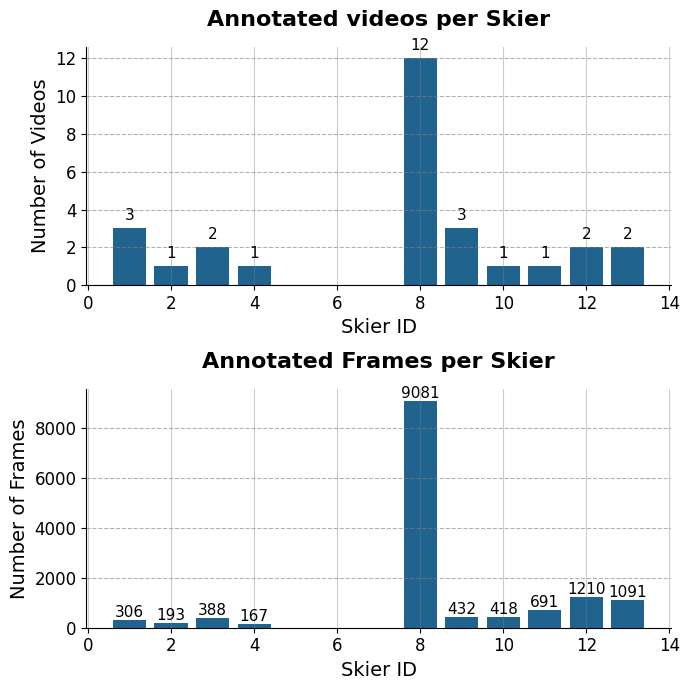

In [4]:
blues = set_custom_color_style()

# Create the figure with 4 subplots
fig, axs = plt.subplots(2, 1, figsize=(7, 7))
#fig.suptitle("Statistics regarding the annotated videos only")

# 1. Bar chart for video count per skier
bar1 = axs[0].bar(skiers_list, list(skier_video_counts.values()))
axs[0].set_title('Annotated videos per Skier', fontsize=16, fontweight='bold', pad=15)
axs[0].set_xlabel('Skier ID', fontsize=14)
axs[0].set_ylabel('Number of Videos', fontsize=14)
axs[0].tick_params(axis='x', labelsize=12)
axs[0].tick_params(axis='y', labelsize=12)
# Add horizontal gridlines for better readability
axs[0].grid(axis='y', linestyle='--', alpha=0.6)
# Remove top and right spines for a cleaner look
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

# 2. Bar chart for frame count per skier
bar2 = axs[1].bar(skiers_list, frame_values)
axs[1].set_title('Annotated Frames per Skier', fontsize=16, fontweight='bold', pad=15)
axs[1].set_xlabel('Skier ID', fontsize=14)
axs[1].set_ylabel('Number of Frames', fontsize=14)
axs[1].tick_params(axis='x', labelsize=12)
axs[1].tick_params(axis='y', labelsize=12)
# Add horizontal gridlines for better readability
axs[1].grid(axis='y', linestyle='--', alpha=0.6)
# Remove top and right spines for a cleaner look
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
print("Frames per skier: ", frame_values, skiers_list)

# Add data labels above each bar
for bar in bar1:
    height = bar.get_height()
    axs[0].text(
        bar.get_x() + bar.get_width() / 2, height + 0.3,
        f'{int(height)}',
        ha='center', va='bottom',
        fontsize=11
    )
    
# Add data labels above each bar
for bar in bar2:
    height = bar.get_height()
    axs[1].text(
        bar.get_x() + bar.get_width() / 2, height + 0.3,
        f'{int(height)}',
        ha='center', va='bottom',
        fontsize=11
    )


# Adjust layout
fig.patch.set_facecolor('white')

fig.tight_layout()

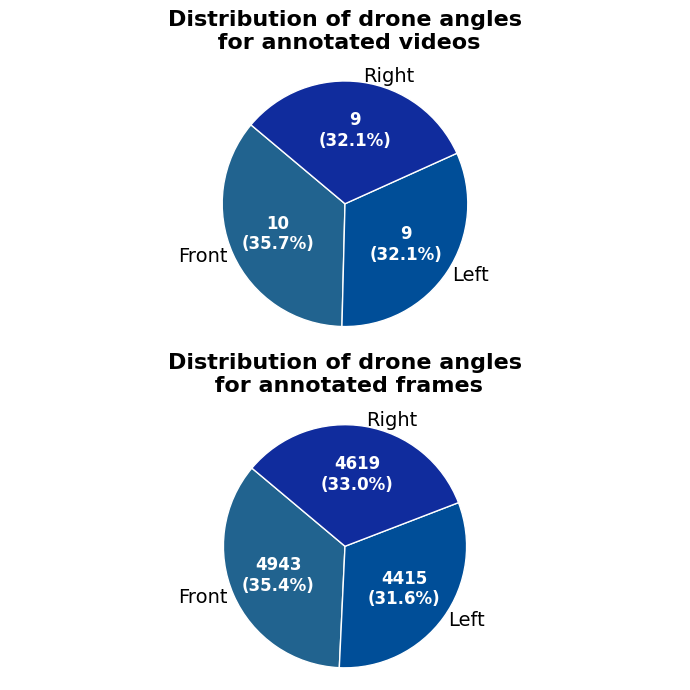

In [16]:
blues = set_custom_color_style()

# Create the figure with 4 subplots
fig, axs = plt.subplots(2, 1, figsize=(7, 7))

# 1. Bar chart for camera angle distribution
create_pie_chart(camera_angles, camera_angle_values, axs[0], 'Distribution of drone angles\n for annotated videos')

# 3. Bar chart for frame distribution by camera angle (Total frames per camera angle)
create_pie_chart(camera_angles, camera_angle_frame_values, axs[1], 'Distribution of drone angles\n for annotated frames')

# Adjust layout
fig.patch.set_facecolor('white')

fig.tight_layout()

In [6]:
import cv2
import os

durations = []

# Loop through all files in the directory
for filename in os.listdir(folder):
        video_path = os.path.join(folder, filename)
        cap = cv2.VideoCapture(video_path)
        
        if not cap.isOpened():
            print(f"Warning: Could not open {filename}")
            continue

        fps = cap.get(cv2.CAP_PROP_FPS)
        frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)

        if fps > 0:
            duration = frame_count / fps
            durations.append(duration)
            print(f"{filename}: {duration:.2f} seconds")
        else:
            print(f"Warning: FPS is zero for {filename}")

        cap.release()

# Compute statistics
if durations:
    average_duration = sum(durations) / len(durations)
    min_duration = min(durations)
    max_duration = max(durations)

    print("\n--- Video Duration Stats ---")
    print(f"Average Duration: {average_duration:.2f} seconds")
    print(f"Minimum Duration: {min_duration:.2f} seconds")
    print(f"Maximum Duration: {max_duration:.2f} seconds")
else:
    print("No valid video files found.")

DJI_0009_cut.mp4: 29.70 seconds
DJI_0014_cut.mp4: 22.80 seconds
DJI_0015_cut.mp4: 21.57 seconds
DJI_0017_cut.mp4: 26.60 seconds
DJI_0018_cut.mp4: 23.30 seconds
DJI_0022_cut.mp4: 25.13 seconds
DJI_0025.MP4: 25.03 seconds
DJI_0038.MP4: 26.86 seconds
DJI_0040.MP4: 21.42 seconds
DJI_0043.MP4: 29.53 seconds
DJI_0044.MP4: 28.60 seconds
DJI_0054_cut.mp4: 22.33 seconds
DJI_0058_test_seq.mp4: 6.70 seconds
DJI_0063.mp4: 16.00 seconds
DJI_0065.mp4: 13.93 seconds
DJI_0068.mp4: 21.17 seconds
DJI_0072.mp4: 19.17 seconds
DJI_0087.mp4: 20.37 seconds
DJI_0092.mp4: 23.03 seconds
DJI_0124_test_seq.mp4: 4.03 seconds
DJI_0128_test_seq.mp4: 3.67 seconds
DJI_0144_test_seq.mp4: 3.63 seconds
DJI_0147_cut.mp4: 6.43 seconds
DJI_0151_cut.mp4: 5.57 seconds
DJI_0153_test_seq.mp4: 3.30 seconds
DJI_0154_test_seq.mp4: 3.27 seconds
DJI_0175_cut.mp4: 6.00 seconds
DJI_0184_cut.mp4: 6.93 seconds

--- Video Duration Stats ---
Average Duration: 16.65 seconds
Minimum Duration: 3.27 seconds
Maximum Duration: 29.70 seconds


All videos stats

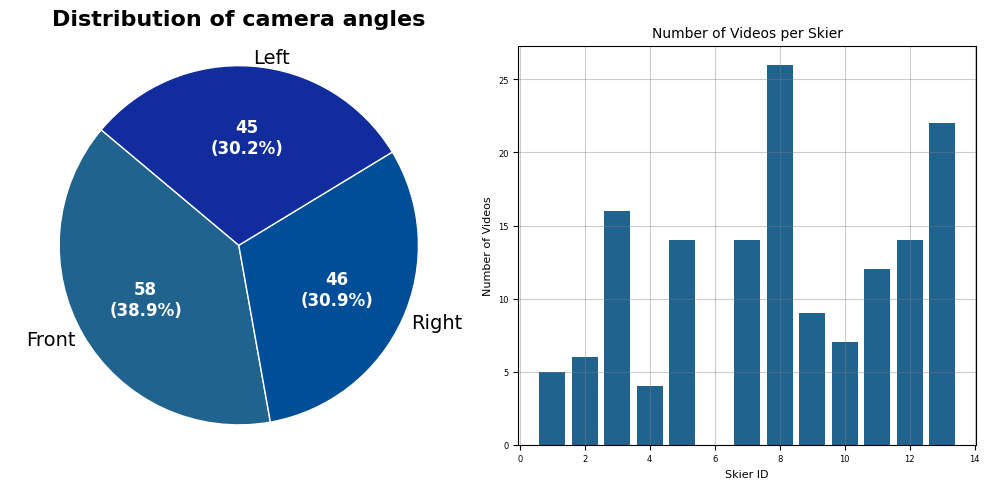

In [7]:
video_directions = {"Front" : 58, "Right" : 46, "Left" : 45}
#videos_per_skier = {1: 5, 2 : 6, 3: 16, 4: 4, 5: 14, 7: 14, 8: 26, 9: 9, 10: 7, 11: 12, 12: 14, 13: 22, 14: 3, 15: 2, 16: 1}
videos_per_skier = {1: 5, 2 : 6, 3: 16, 4: 4, 5: 14, 7: 14, 8: 26, 9: 9, 10: 7, 11: 12, 12: 14, 13: 22}
blues = set_custom_color_style()

# Create the figure with 4 subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
#fig.suptitle("Statistics regarding all videos")

create_pie_chart(video_directions.keys(), video_directions.values(), axs[0], 'Distribution of camera angles')

axs[1].bar(videos_per_skier.keys(), videos_per_skier.values())
axs[1].set_xlabel('Skier ID')
axs[1].set_ylabel('Number of Videos')
axs[1].set_title('Number of Videos per Skier')

fig.patch.set_facecolor('white')

fig.tight_layout()


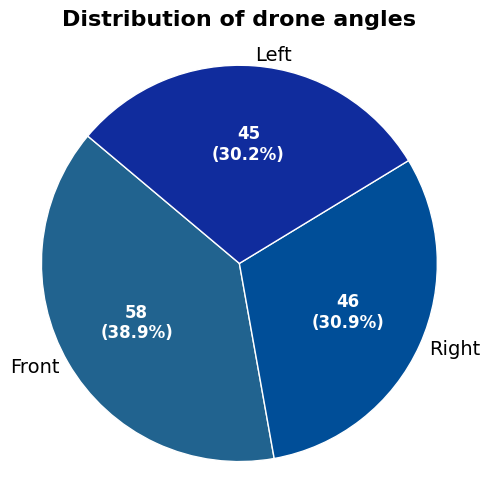

In [8]:
video_directions = {"Front" : 58, "Right" : 46, "Left" : 45}
#videos_per_skier = {1: 5, 2 : 6, 3: 16, 4: 4, 5: 14, 7: 14, 8: 26, 9: 9, 10: 7, 11: 12, 12: 14, 13: 22, 14: 3, 15: 2, 16: 1}
videos_per_skier = {1: 5, 2 : 6, 3: 16, 4: 4, 5: 14, 7: 14, 8: 26, 9: 9, 10: 7, 11: 12, 12: 14, 13: 22}
blues = set_custom_color_style()

# Create the figure with 4 subplots
fig, axs = plt.subplots(1, 1, figsize=(5, 5))
#fig.suptitle("Statistics regarding all videos")

create_pie_chart(video_directions.keys(), video_directions.values(), axs, 'Distribution of drone angles')

fig.patch.set_facecolor('white')

fig.tight_layout()

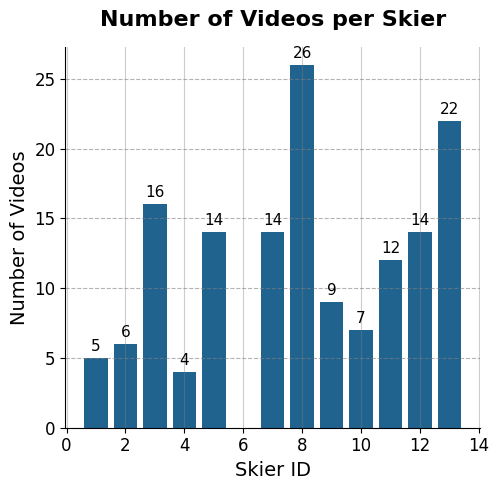

In [9]:
#videos_per_skier = {1: 5, 2 : 6, 3: 16, 4: 4, 5: 14, 7: 14, 8: 26, 9: 9, 10: 7, 11: 12, 12: 14, 13: 22, 14: 3, 15: 2, 16: 1}
videos_per_skier = {1: 5, 2 : 6, 3: 16, 4: 4, 5: 14, 7: 14, 8: 26, 9: 9, 10: 7, 11: 12, 12: 14, 13: 22}
blues = set_custom_color_style()

# Create the figure with 4 subplots
fig, axs = plt.subplots(figsize=(5, 5))

bars = axs.bar(videos_per_skier.keys(), videos_per_skier.values(), linewidth=0.7)
axs.set_xlabel('Skier ID', fontsize=14)
axs.set_ylabel('Number of Videos', fontsize=14)
axs.set_title('Number of Videos per Skier', fontsize=16, fontweight='bold', pad=15)

# Adjust tick label sizes (x and y)
axs.tick_params(axis='x', labelsize=12)
axs.tick_params(axis='y', labelsize=12)

# Add horizontal gridlines for better readability
axs.grid(axis='y', linestyle='--', alpha=0.6)

# Remove top and right spines for a cleaner look
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)

# Add data labels above each bar
for bar in bars:
    height = bar.get_height()
    axs.text(
        bar.get_x() + bar.get_width() / 2, height + 0.3,
        f'{int(height)}',
        ha='center', va='bottom',
        fontsize=11
    )

fig.patch.set_facecolor('white')

fig.tight_layout()

In [10]:
import cv2
#from moviepy.editor import VideoFileClip

def cut_video_by_frames(input_video, output_video, start_frame, end_frame):
    # Open the video using OpenCV
    cap = cv2.VideoCapture(input_video)
    
    # Get video properties
    fps = cap.get(cv2.CAP_PROP_FPS)  # Frames per second
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))  # Total number of frames

    # Ensure that the frame range is valid
    if start_frame < 0 or end_frame > total_frames or start_frame >= end_frame:
        raise ValueError("Invalid frame range")

    # Set the start frame for capturing
    cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)

    # Create a VideoWriter to save the output video
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for saving the video
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    out = cv2.VideoWriter(output_video, fourcc, fps, (frame_width, frame_height))

    # Read and write frames between start_frame and end_frame
    current_frame = start_frame
    while current_frame < end_frame:
        ret, frame = cap.read()
        if not ret:
            break
        out.write(frame)
        current_frame += 1

    # Release resources
    cap.release()
    out.release()
    print(f"Video cut and saved to {output_video}")

# # Example usage
# input_video = r'C:\awilde\britta\LTU\SkiingProject\SkiersProject\Data\annotated_videos\DJI_0009.mp4'
# output_video = r'C:\awilde\britta\LTU\SkiingProject\SkiersProject\Data\annotated_videos\DJI_0009_cut.mp4'
# start_frame = 0  # Start frame number
# end_frame = 890   # End frame number

# cut_video_by_frames(input_video, output_video, start_frame, end_frame)